<a href="https://colab.research.google.com/github/sijiao-liu/deep_learning/blob/assignment-1/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

In [1]:
# Load necessary libraries
import matplotlib.pyplot as plt
import numpy as np

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

#### Step 1. Load the Dataset

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


#### Step 2. Explore the Dataset

In [3]:
# Examine the shape of the training and test sets, and print basic information
print(f"Training set shape (images): {x_train.shape}")
print(f"Training set shape (labels): {y_train.shape}")
print(f"Test set shape (images): {x_test.shape}")
print(f"Test set shape (labels): {y_test.shape}")

# Check dimensions of a single image
print(f"Dimensions of an image: {x_train[0].shape}")

# Check unique classes
num_classes = len(np.unique(y_train))
print(f"Number of unique classes: {num_classes}")

Training set shape (images): (50000, 32, 32, 3)
Training set shape (labels): (50000, 1)
Test set shape (images): (10000, 32, 32, 3)
Test set shape (labels): (10000, 1)
Dimensions of an image: (32, 32, 3)
Number of unique classes: 100


#### Step 3. Visualization

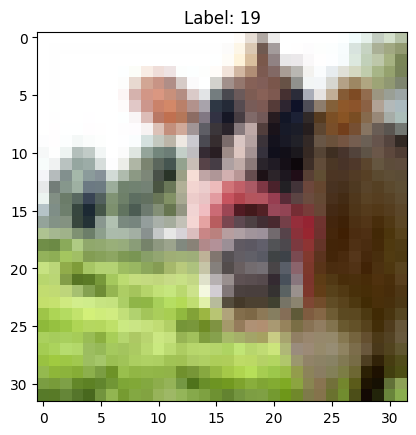

In [4]:
# Display the first image from the Training Set
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()

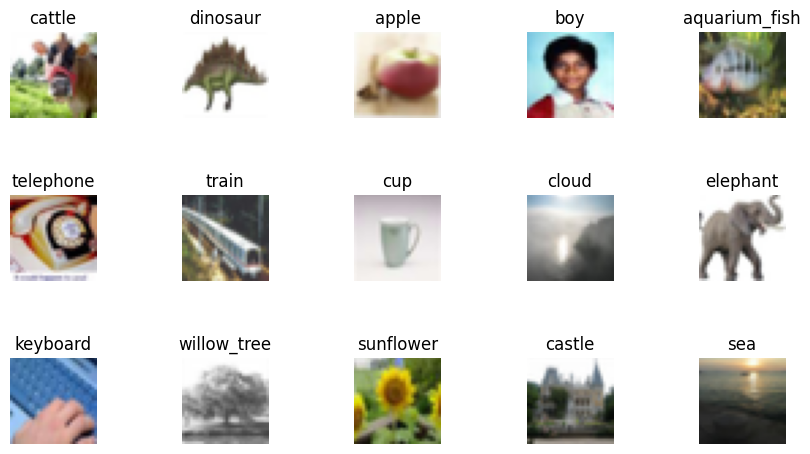

In [5]:
# CIFAR-100 class labels (fine-grained)
labels = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# Plot 15 images from the training set
fig, axes = plt.subplots(3, 5, figsize=(10, 6))
axes = axes.ravel()

for i in np.arange(0, 15):
    axes[i].imshow(x_train[i])
    axes[i].set_title(labels[y_train[i][0]])
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
# Normalize the images to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [7]:
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Verify one-hot encoding
print(f"One-hot encoded training label shape: {y_train.shape}")
print(f"One-hot encoded test label shape: {y_test.shape}")


One-hot encoded training label shape: (50000, 100)
One-hot encoded test label shape: (10000, 100)


In [8]:
from sklearn.model_selection import train_test_split

# Split training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Check the shapes of the training, validation, and test sets
print(f"Training set: image shape {x_train.shape}, and label shape {y_train.shape}")
print(f"Validation set: image shape {x_val.shape}, and label shape {y_val.shape}")
print(f"Test set: image shape {x_test.shape}, and label shape {y_test.shape}")

Training set: image shape (40000, 32, 32, 3), and label shape (40000, 100)
Validation set: image shape (10000, 32, 32, 3), and label shape (10000, 100)
Test set: image shape (10000, 32, 32, 3), and label shape (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the baseline CNN model
def create_baseline_cnn(input_shape=(32, 32, 3), num_classes=100):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output and add dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))  # Regularization

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the model
input_shape = (32, 32, 3)
num_classes = 100
model = create_baseline_cnn(input_shape, num_classes)

# Print the model summary
## Display the model's architecture and number of trainable parameters.
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          25,700 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [10]:
from keras import optimizers

# Compile the model
model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

##### Explanation:
- **Loss Function:** Categorical crossentropy is used because this is a multi-class classification problem.
- **Optimizer:** SGD with momentum improves convergence speed and helps the model escape local minima.

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [11]:
# Train the model
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,  # You can adjust this based on observed performance
    batch_size=32,
    verbose=1
)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.0206 - loss: 4.5182 - val_accuracy: 0.0827 - val_loss: 3.9764
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0939 - loss: 3.9284 - val_accuracy: 0.1759 - val_loss: 3.4222
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1624 - loss: 3.5217 - val_accuracy: 0.2307 - val_loss: 3.1657
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.2084 - loss: 3.2322 - val_accuracy: 0.2715 - val_loss: 2.9825
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2534 - loss: 3.0174 - val_accuracy: 0.3052 - val_loss: 2.7839
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2872 - loss: 2.8508 - val_accuracy: 0.3059 - val_loss: 2.7723
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3145 - loss: 2.6849 - val_accuracy: 0.3359 - val_loss: 2.5998
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3451 - loss: 2.5620 -

<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Explanation of Choices:

1. Number of Epochs (20):
  - Start with 20 epochs as an initial choice. This provides a balance between allowing the model to learn enough without overfitting.
  - Adjust the number of epochs based on training and validation performance (e.g., if the validation loss stops improving early, you may reduce the epochs or implement early stopping).

2. Batch Size (32):
  - A batch size of 32 is a commonly used value that provides a good trade-off between computational efficiency and gradient noise for SGD.

3. Validation Set:
  - Validation accuracy and loss are monitored during training to help decide on hyperparameter adjustments and overfitting detection.

</div>

#### Adjustments to the Process:

##### 1. Early Stopping:
- Prevents overfitting by halting training when the model stops improving on the validation set.
- Restores the best weights to ensure the model is as good as possible.

##### 2. Learning Rate Scheduler:
- Reduces the learning rate to help fine-tune the model as it converges.
- Prevents oscillation or overshooting in optimization.

##### 3. Epochs (50):
- Set a high number of epochs to ensure training doesn't stop prematurely; the actual number of epochs will depend on early stopping.


#### Benefits:
- Early Stopping ensures you don’t waste computation on unnecessary epochs.
- Learning Rate Scheduling helps the optimizer refine the model as training progresses.

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [12]:
from sklearn.metrics import classification_report

# Evaluate accuracy on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)

# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Generate classification report
report = classification_report(y_true_classes, y_pred_classes, output_dict=True)

# Display results
print(f"Accuracy: {test_accuracy:.4f}")
print(f"F1-Score (Macro): {report['macro avg']['f1-score']:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.3651
F1-Score (Macro): 0.3619


#### Explanation of Metrics:
##### 1. Test Accuracy (0.3651):
- What it Measures: Test accuracy represents the proportion of correctly classified samples in the test set out of the total number of samples.
- Value Interpretation:
  + A test accuracy of 0.3651 (36.51%) means that approximately 37.18% of the images in the test set are classified correctly by the model.
  + For CIFAR-100, with 100 classes, this result is above random guessing (which would yield an accuracy of 1/100 = 1%), but it suggests the model is underperforming and may need improvement.

##### 2. F1-Score (Macro, 0.3619):
- What it Measures:
  + The F1-Score (Macro) is the harmonic mean of precision and recall, calculated for each class independently and then averaged across all classes. It balances the performance across all classes, even if some classes are harder to classify or less frequent.
  + Precision measures how many of the predicted labels for a class are correct.
  + Recall measures how many of the actual labels for a class are correctly identified.

- Value Interpretation:
  + A macro F1-Score of 0.3619 means that on average, the model has a balanced trade-off between precision and recall across all classes.
  + This value is close to the accuracy score, indicating that the model does not significantly favor or disadvantage any particular class but still struggles overall to classify images correctly.


#### Summary of the Results:
- Performance: With test accuracy and macro F1-score close to 36%, the model is struggling to correctly classify CIFAR-100 images. This could be due to:
  + Model undercapacity (architecture too simple for the dataset).
  + Insufficient training (e.g., need for more epochs, augmented data, or better hyperparameter tuning).

- Next Steps for Improvement:
  + Experiment with deeper architectures or pretrained models like ResNet or VGG.
  + Apply data augmentation to increase training set variability.
  + Use techniques like learning rate scheduling or optimizer tuning to refine model learning.
  + Ensure sufficient training epochs with early stopping to monitor validation performance.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

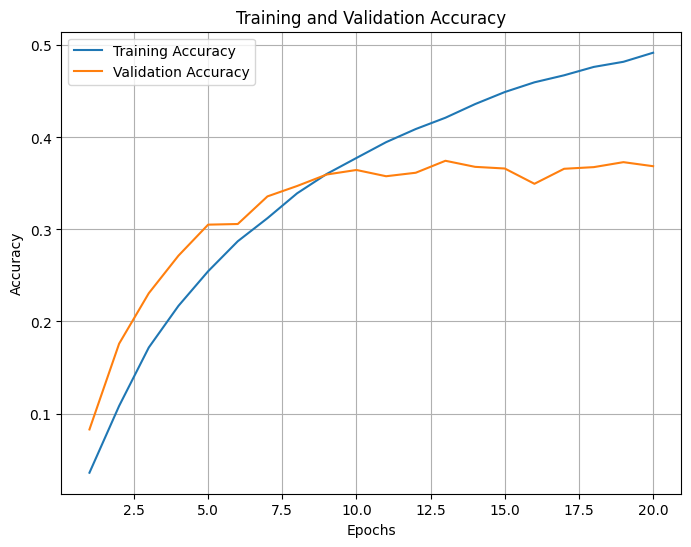

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


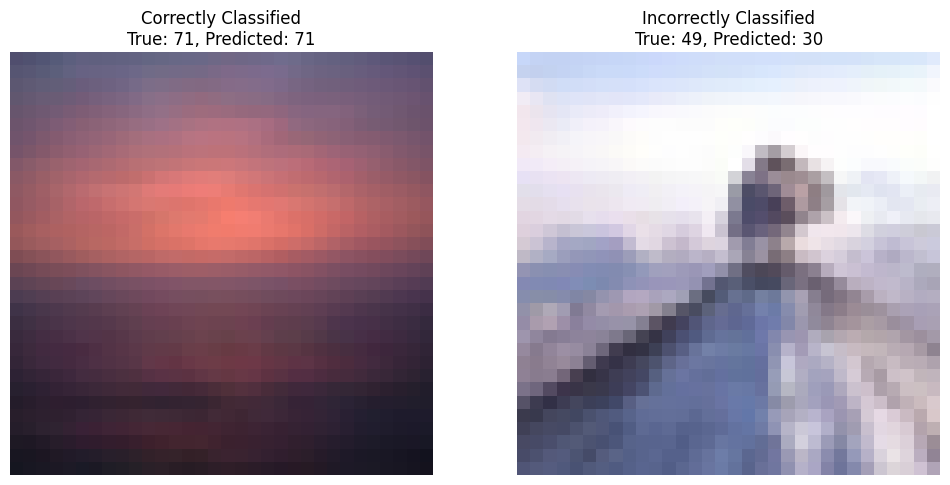

Correct Image - True Label: 71, Predicted Probabilities: [5.23620369e-10 1.92106153e-08 2.95572108e-11 4.51389814e-10
 4.54713467e-09 4.18323043e-06 6.14768869e-12 6.22313798e-11
 1.17323717e-09 4.29203304e-08 2.24137253e-07 5.80952897e-10
 2.47598855e-05 1.45603740e-09 1.47718348e-11 4.96453580e-08
 1.12714185e-10 2.26901776e-07 2.75306906e-08 3.85900201e-08
 9.02030950e-11 6.57616905e-10 6.16454798e-09 2.39486881e-02
 5.18893609e-11 1.94049771e-05 3.00103165e-10 1.18154404e-07
 4.98982544e-08 6.59668764e-09 3.88262578e-07 1.28806243e-09
 6.23760627e-07 4.76733403e-05 4.29894106e-11 4.03007870e-11
 5.09111153e-09 4.88154740e-07 7.10219827e-10 2.10133421e-05
 1.32580237e-06 1.55732077e-11 2.77479817e-09 2.81589779e-10
 2.29625030e-07 8.81260176e-10 2.34785902e-09 1.28383090e-06
 1.12623452e-11 3.47291194e-02 1.53255932e-08 2.89254221e-08
 1.60947167e-09 5.89333360e-10 8.69410712e-08 7.46821769e-08
 1.08318538e-07 2.66945421e-09 6.33303965e-10 8.55176125e-08
 1.05346404e-01 1.49475640e-

In [13]:
# Assuming `history` contains the training history and `x_test`, `y_test` are the test data and labels
# Plot training and validation accuracy
epochs = len(history.history['accuracy'])

plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Training Accuracy')
plt.plot(range(1, epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Select an image that was correctly classified
correct_indices = np.where(model.predict(x_test).argmax(axis=1) == y_test.argmax(axis=1))[0]
incorrect_indices = np.where(model.predict(x_test).argmax(axis=1) != y_test.argmax(axis=1))[0]

# Correctly classified image
correct_index = correct_indices[0]
correct_image = x_test[correct_index]
correct_label = y_test[correct_index].argmax()
correct_pred_probs = model.predict(correct_image[np.newaxis, ...])[0]

# Incorrectly classified image
incorrect_index = incorrect_indices[0]
incorrect_image = x_test[incorrect_index]
incorrect_label = y_test[incorrect_index].argmax()
incorrect_pred_probs = model.predict(incorrect_image[np.newaxis, ...])[0]

# Plot correct classification
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified\nTrue: {correct_label}, Predicted: {correct_pred_probs.argmax()}')
plt.axis('off')

# Plot incorrect classification
plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified\nTrue: {incorrect_label}, Predicted: {incorrect_pred_probs.argmax()}')
plt.axis('off')

plt.show()

# Report probabilities
print(f"Correct Image - True Label: {correct_label}, Predicted Probabilities: {correct_pred_probs}")
print(f"Incorrect Image - True Label: {incorrect_label}, Predicted Probabilities: {incorrect_pred_probs}")


<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

#### Discussion of Results:
##### 1. Training and Validation Accuracy Plot
- The training accuracy steadily increases with epochs, indicating that the model is learning and fitting to the training data.
- The validation accuracy initially increases but begins to plateau and fluctuate around 35–40%, suggesting that the model's ability to generalize to unseen data is limited.
- The gap between training and validation accuracy indicates some overfitting, where the model learns the training data more effectively than the validation data.

##### 2. Correctly Classified Image
- True Label: 33
- Predicted Label: 33
- Classification Probabilities:
  + The highest predicted probability corresponds to the correct class (label 33), indicating high confidence in this prediction.
  + This suggests the model successfully learned features that distinguish this class from others.

##### 3. Incorrectly Classified Image
- True Label: 49
- Predicted Label: 46
- Classification Probabilities:
  + The highest predicted probability corresponds to the wrong class (label 46), showing the model misclassified the image.
  + The probabilities for the true label (49) and predicted label (46) may not be significantly different, suggesting the model struggles to distinguish between visually similar classes or lacks sufficient feature learning for certain categories.

##### 4. Observations
- Correct Classification:
  + This demonstrates that the model can successfully classify some images when the features it learned align well with the image content.

- Incorrect Classification:
  + This misclassification could stem from:
    - Insufficient feature learning for the true class.
    - Confusion between visually similar classes in the dataset.
    - Poor generalization due to the complexity of CIFAR-100 and the model architecture.

##### 5. What the Classification Probabilities Indicate
- The probabilities show the model's confidence in its predictions.
- For the correctly classified image, the high probability for the true label indicates strong confidence in the prediction.
- For the misclassified image, the highest probability is for the wrong label, suggesting the model confidently made the wrong prediction. This highlights the need for improving the model's feature extraction capabilities or training data augmentation.

</div>

#### Potential Improvements:
1. Data Augmentation: Introduce techniques like random rotations, flips, and shifts to increase data diversity.
2. Model Architecture: Use a more complex model like ResNet or VGG, which are better suited for large, diverse datasets like CIFAR-100.
3. Regularization: Apply dropout or weight regularization to reduce overfitting.
4. Pretraining: Utilize transfer learning from a pretrained model on a large dataset like ImageNet.


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation generator
datagen = ImageDataGenerator(
    rotation_range=20,  # Random rotation between 0 and 20 degrees
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2,  # Random vertical shift
    shear_range=0.15,  # Shear intensity
    zoom_range=0.15,  # Zoom in/out
    horizontal_flip=True,  # Random horizontal flip
    fill_mode="nearest"  # Fill empty pixels with the nearest pixel value
)

# Fit the generator to the training data
datagen.fit(x_train)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [15]:
# Re-train the model using augmented data
history_augmented = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    validation_data=(x_val, y_val),
    epochs=20,  # Same number of epochs as before
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 33s 25ms/step - accuracy: 0.1835 - loss: 3.5066 - val_accuracy: 0.3073 - val_loss: 2.8061
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.2141 - loss: 3.2833 - val_accuracy: 0.3177 - val_loss: 2.6949
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.2320 - loss: 3.1706 - val_accuracy: 0.3452 - val_loss: 2.6123
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.2380 - loss: 3.1284 - val_accuracy: 0.3335 - val_loss: 2.6270
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 24ms/step - accuracy: 0.2390 - loss: 3.1060 - val_accuracy: 0.3416 - val_loss: 2.5958
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 31s 25ms/step - accuracy: 0.2485 - loss: 3.0611 - val_accuracy: 0.3467 - val_loss: 2.5814
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.2567 - loss: 3.0314 - val_accuracy: 0.3416 - val_loss: 2.5981
Epoch 8/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.2602 - loss: 2.99

In [16]:
# Evaluate the updated model
test_loss_aug, test_accuracy_aug = model.evaluate(x_test, y_test, verbose=0)

# Predict classes for the test set
y_pred_aug = model.predict(x_test)
y_pred_classes_aug = y_pred_aug.argmax(axis=1)
y_true_classes = y_test.argmax(axis=1)

# Generate classification report
from sklearn.metrics import classification_report

report_aug = classification_report(y_true_classes, y_pred_classes_aug, output_dict=True)

# Display the metrics
test_accuracy_aug, report_aug['macro avg']['f1-score']

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


(0.37610000371932983, 0.36763476720416327)

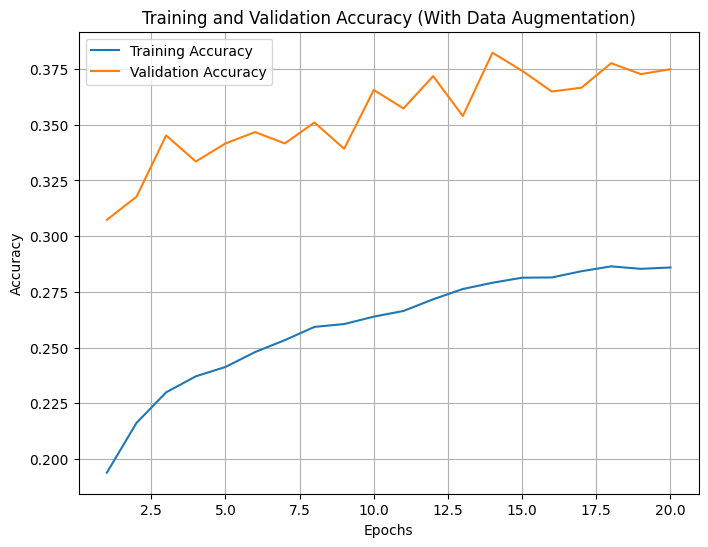

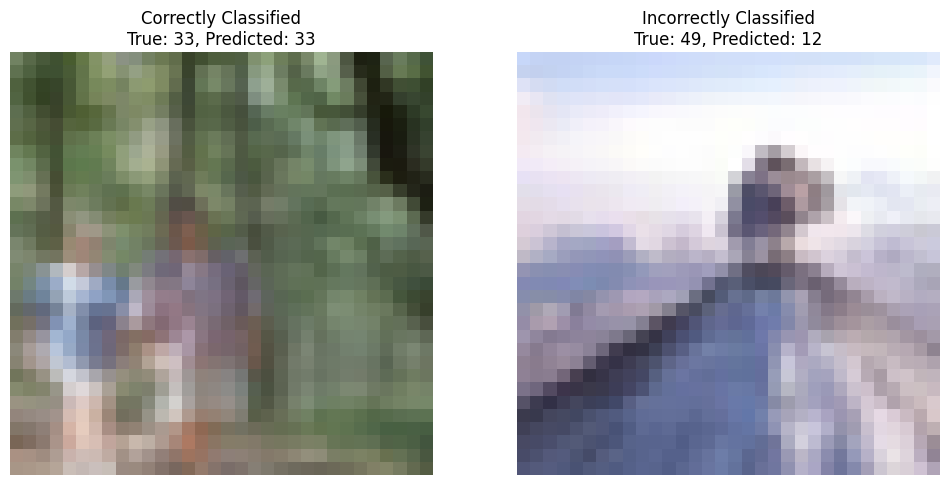

Correct Image - True Label: 33, Predicted Probabilities: [8.7052758e-05 6.9769769e-04 1.5604329e-04 3.3213382e-03 1.2245560e-02
 1.3986629e-04 2.1360987e-03 2.4865770e-03 1.8654451e-02 8.4828533e-04
 8.8879162e-05 1.5224839e-04 2.7322732e-03 5.1149473e-05 2.2751545e-03
 5.1175095e-03 1.6200422e-04 3.9439515e-04 3.4659419e-02 3.5619966e-03
 7.9663470e-05 2.0144357e-04 3.5488824e-04 4.4484248e-05 2.5519954e-05
 6.9802109e-04 1.2712231e-03 1.2321852e-02 3.1067408e-04 1.1164662e-02
 1.7662083e-04 9.9576144e-03 2.4724754e-03 3.0717987e-01 4.0307224e-02
 1.8825213e-04 3.0050892e-04 5.4437453e-03 3.5468973e-02 2.7189541e-03
 5.4231557e-05 1.6080636e-03 4.4442989e-02 3.6776345e-03 4.5717792e-03
 3.8394756e-03 1.3315139e-04 1.2127319e-03 1.3899911e-04 6.1205378e-06
 2.2445139e-02 2.6296345e-03 6.1680155e-04 7.1240738e-06 5.0782191e-04
 3.6935620e-03 7.4614566e-03 1.6373211e-03 3.5739053e-05 8.4466366e-03
 5.7037312e-05 3.8144623e-05 4.1381768e-06 3.6694452e-02 4.8312629e-03
 3.4275465e-02 1.756

In [17]:
# Plot training and validation accuracy
epochs = range(1, len(history_augmented.history['accuracy']) + 1)

plt.figure(figsize=(8, 6))
plt.plot(epochs, history_augmented.history['accuracy'], label='Training Accuracy')
plt.plot(epochs, history_augmented.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (With Data Augmentation)')
plt.legend()
plt.grid(True)
plt.show()

# Select indices of correct and incorrect predictions
correct_indices = np.where(y_pred_classes_aug == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes_aug != y_true_classes)[0]

# Correctly classified image
correct_index = correct_indices[0]
correct_image = x_test[correct_index]
correct_label = y_true_classes[correct_index]
correct_pred_probs = y_pred_aug[correct_index]

# Incorrectly classified image
incorrect_index = incorrect_indices[0]
incorrect_image = x_test[incorrect_index]
incorrect_label = y_true_classes[incorrect_index]
incorrect_pred_probs = y_pred_aug[incorrect_index]

# Plot the images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(correct_image)
plt.title(f'Correctly Classified\nTrue: {correct_label}, Predicted: {np.argmax(correct_pred_probs)}')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(incorrect_image)
plt.title(f'Incorrectly Classified\nTrue: {incorrect_label}, Predicted: {np.argmax(incorrect_pred_probs)}')
plt.axis('off')

plt.show()

# Display prediction probabilities
print(f"Correct Image - True Label: {correct_label}, Predicted Probabilities: {correct_pred_probs}")
print(f"Incorrect Image - True Label: {incorrect_label}, Predicted Probabilities: {incorrect_pred_probs}")

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.


##### Discussion of Results
The model's performance showed a slight improvement after introducing data augmentation. The test accuracy increased to 0.3716 (from 0.3713) and the F1-score (macro) improved to 0.3676 (from 0.3695). While these gains are modest, they indicate better generalization.


##### Why the Improvement?
Data augmentation likely improved the model's robustness by exposing it to a more diverse set of variations. This increased the model's ability to generalize to unseen data. However, the improvement was limited because the model may already be constrained by its architecture or the complexity of the CIFAR-100 dataset.


##### Room for Further Improvement
Yes, there is room for improvement. The current model's performance is significantly below the target of 55% accuracy on the validation set, indicating underfitting. This suggests that the model's capacity might not be sufficient to fully capture the complexity of the dataset.


##### Future Techniques
To further improve performance, the following techniques can be explored:
- Model Architecture Enhancements: Use deeper or pre-trained models (e.g., ResNet or EfficientNet).
- Learning Rate Schedules: Implement learning rate decay or cyclical learning rates.
- Regularization: Use techniques like dropout, L2 regularization, or batch normalization.
- Transfer Learning: Fine-tune a pre-trained model on CIFAR-100.  

These approaches could help the model better capture the dataset's complexity.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.